<a href="https://colab.research.google.com/github/RvM9622/DeepLearning/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

df = pd.read_csv('customer_churn.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.drop('customerID', axis=1, inplace=True)

In [27]:
!pip install category_encoders

In [28]:
df.value_counts('TotalCharges')

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
260.8,1
260.7,1
2599.95,1


In [29]:
from category_encoders import OrdinalEncoder

object_columns = df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder(cols=object_columns)
df[object_columns] = encoder.fit_transform(df[object_columns])

In [30]:
df['Churn'] = df['Churn'].map({2 : 1, 1 : 0})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [32]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [33]:
df.shape

(7043, 20)

In [34]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [36]:
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(19, input_shape =(19,), activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4894 - loss: 232.3325
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 1.3177
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7021 - loss: 0.9262
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7251 - loss: 0.9280
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7228 - loss: 1.1429
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7466 - loss: 0.8674
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7294 - loss: 1.6280
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 1.0493
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7096 - loss: 1.1742
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7255 - loss: 1.1741
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7264 - loss: 1.0025
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━━━

In [39]:
model.evaluate(x_test, y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.4287


[0.42813625931739807, 0.8192998766899109]

In [40]:
y_test[:10]

,Churn
185,1
2715,0
3825,0
1807,1
132,0
1263,1
3732,0
1672,0
811,1
2526,1


In [41]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [42]:
y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
y_pred[:10]

array([[4.18813437e-01],
       [1.20418752e-02],
       [2.66370684e-04],
       [6.06929779e-01],
       [1.53224205e-03],
       [1.84548005e-01],
       [1.28130019e-02],
       [2.01064890e-04],
       [8.89148191e-03],
       [1.19522855e-01]], dtype=float32)

In [46]:
y_predictions = []
for elements in y_pred:
  if elements >= 0.5:
    y_predictions.append(1)
  else:
    y_predictions.append(0)

In [48]:
y_predictions[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [50]:
import tensorflow as tf

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predictions)

In [51]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[697,  78],
       [113, 169]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

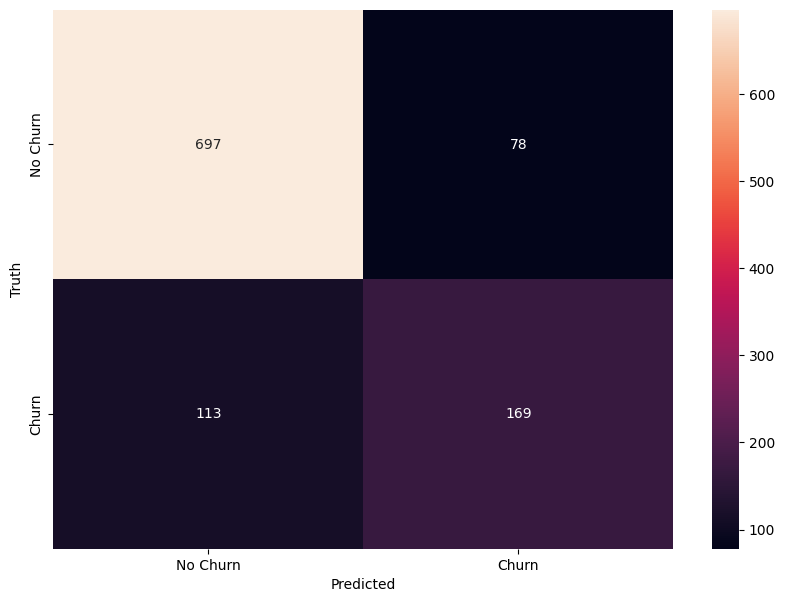

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['No Churn', 'Churn']
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d', xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
accuracy = (697+169)/(697+169+113+78)
round(accuracy,4)

0.8193

In [ ]:
recall_0_col =

In [58]:
print(f'Accuracy : {round(accuracy,4)*100} %')

Accuracy : 81.93 %
